# Random Forest

###### https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
###### https://towardsdatascience.com/getting-started-to-data-analysis-with-python-pandas-with-titanic-dataset-a195ab043c77
###### https://medium.com/analytics-vidhya/random-forest-on-titanic-dataset-88327a014b4d


In [36]:
#%pip install plotnine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

df_titanic=sns.load_dataset('titanic') 

df_titanic['embarked'].fillna(value='S', inplace=True)
df_titanic['fare'].fillna(value=df_titanic.fare.mean(), inplace=True)
df_titanic['age'].fillna(value=df_titanic.age.mode()[0], inplace=True)

X = df_titanic.drop('survived', axis=1)
y = df_titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)


print('\nNull Values in df_titanic \n{}'.format(df_titanic.isnull().sum()))
print('\nNull Values in Training \n{}'.format(X_train.isnull().sum()))
print('\nNull Values in Testing \n{}'.format(X_test.isnull().sum()))

print('\nDuplicated values in train {}'.format(X_train.duplicated().sum()))
print('Duplicated values in test {}'.format(X_test.duplicated().sum()))



Null Values in df_titanic 
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Null Values in Training 
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           483
embark_town      1
alive            0
alone            0
dtype: int64

Null Values in Testing 
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           205
embark_town      1
alive            0
alone            0
dtype: int64

Duplicated values in train 66
Duplicated values in test 17


In [35]:
df_titanic.age.mode()[0]

24.0

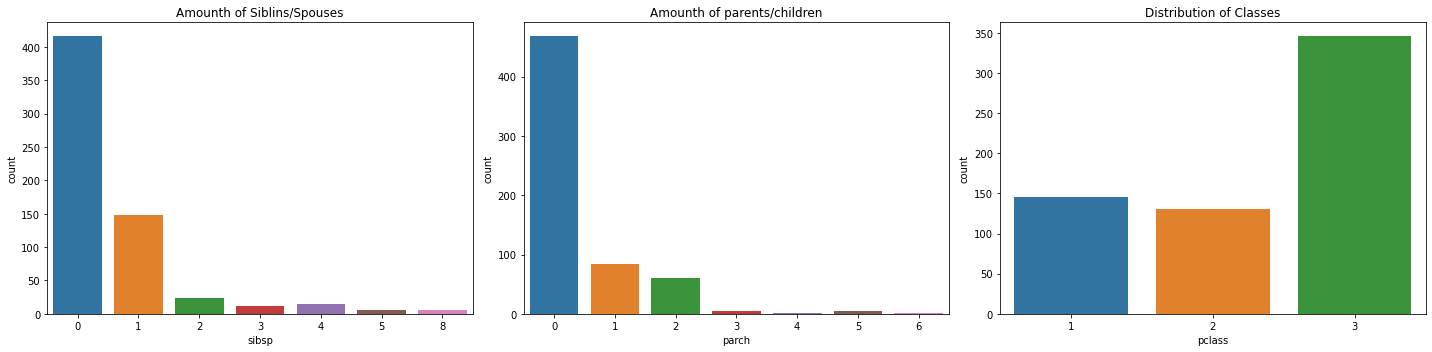

In [37]:
ig, axx = plt.subplots(1, 3, figsize=(20,5))
axx[0].set_title('Amounth of Siblins/Spouses')
sns.countplot(x='sibsp', data=X_train, ax=axx[0])
axx[1].set_title('Amounth of parents/children')
sns.countplot(x='parch', data=X_train, ax=axx[1])
axx[2].set_title('Distribution of Classes')
sns.countplot(x='pclass', data=X_train, ax=axx[2])
plt.tight_layout()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,familiars
520,1,female,30.0,0,0,93.5000,S,First,woman,False,B,Southampton,yes,1,1,1
510,3,male,29.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,1,1,1
446,2,female,13.0,0,1,19.5000,S,Second,child,False,NaN,Southampton,yes,0,1,2
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,1,1,1
691,3,female,4.0,0,1,13.4167,C,Third,child,False,NaN,Cherbourg,yes,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,3,male,19.0,0,0,14.5000,S,Third,man,True,NaN,Southampton,no,1,0,1
838,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,1,1,1
337,1,female,41.0,0,0,134.5000,C,First,woman,False,E,Cherbourg,yes,1,1,1
523,1,female,44.0,0,1,57.9792,C,First,woman,False,B,Cherbourg,yes,0,1,2


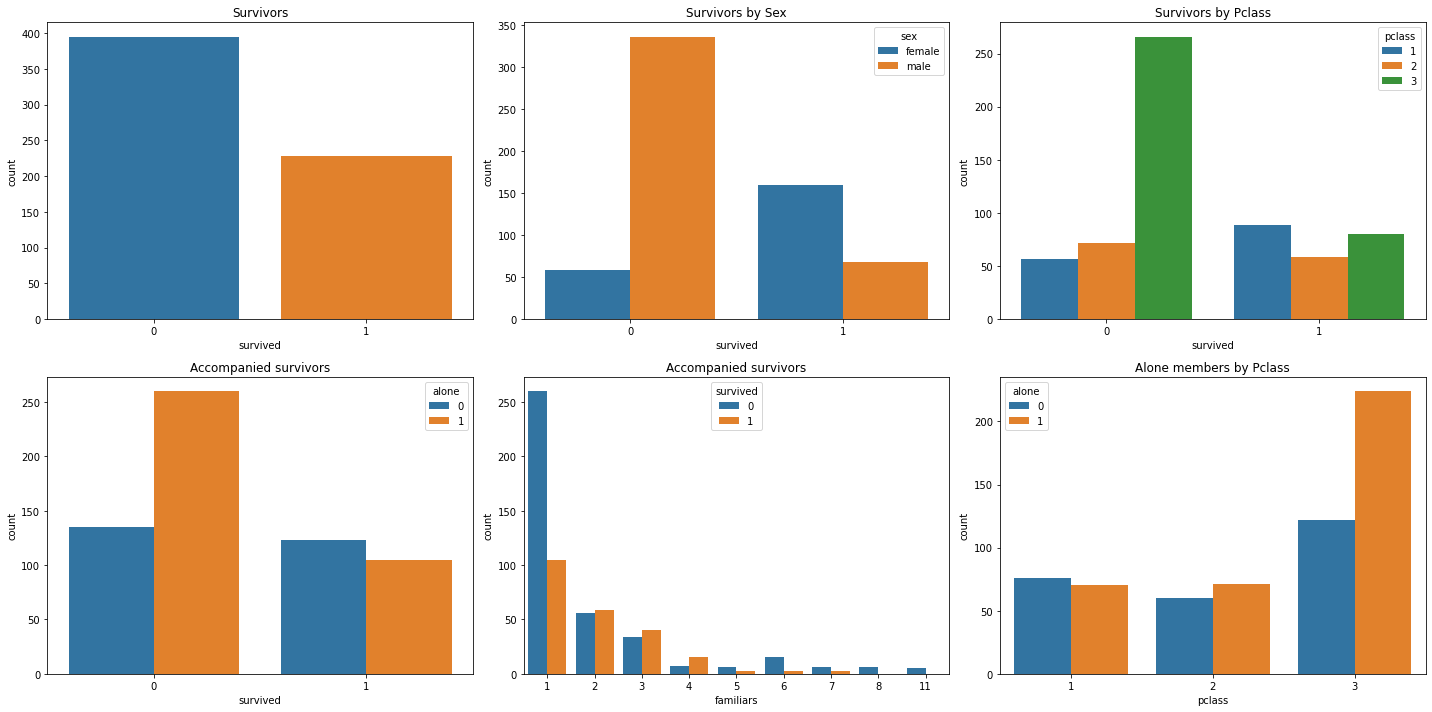

In [38]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0

train_data = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)
test_data = pd.concat([X_test, pd.DataFrame(y_test)], axis=1)
 
train_data['alone'] = train_data[['sibsp','parch']].apply(create_alone_feature, axis=1)
train_data['familiars'] = 1 + train_data['sibsp'] + train_data['parch']

test_data['alone'] = test_data[['sibsp','parch']].apply(create_alone_feature, axis=1)
test_data['familiars'] = 1 + test_data['sibsp'] + test_data['parch']

fig, axx = plt.subplots(2, 3, figsize=(20,10))
axx[0,0].set_title('Survivors')
sns.countplot(x='survived', data=train_data, ax=axx[0,0])
axx[0,1].set_title('Survivors by Sex')
sns.countplot(x='survived', hue='sex', data=train_data, ax=axx[0,1])
axx[0,2].set_title('Survivors by Pclass')
sns.countplot(x='survived', hue='pclass', data=train_data, ax=axx[0,2])
axx[1,0].set_title('Accompanied survivors')
sns.countplot(x='survived', hue='alone', data=train_data, ax=axx[1,0])
axx[1,1].set_title('Accompanied survivors')
sns.countplot(x='familiars', hue='survived', data=train_data, ax=axx[1,1])
axx[1,2].set_title('Alone members by Pclass')
sns.countplot(x='pclass', hue='alone', data=train_data, ax=axx[1,2])
plt.tight_layout()

train_data

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,familiars
331,1,0,45.5,0,0,28.5000,1,First,man,True,C,Southampton,no,1,0,1
700,1,1,18.0,1,0,227.5250,2,First,woman,False,C,Cherbourg,yes,0,1,2
748,1,0,19.0,1,0,53.1000,1,First,man,True,D,Southampton,no,0,0,2
751,3,0,6.0,0,1,12.4750,1,Third,child,False,E,Southampton,yes,0,1,2
481,2,0,24.0,0,0,0.0000,1,Second,man,True,NaN,Southampton,no,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,3,0,24.0,0,0,7.7292,3,Third,man,True,NaN,Queenstown,no,1,0,1
416,2,1,34.0,1,1,32.5000,1,Second,woman,False,NaN,Southampton,yes,0,1,3
407,2,0,3.0,1,1,18.7500,1,Second,child,False,NaN,Southampton,yes,0,1,3
482,3,0,50.0,0,0,8.0500,1,Third,man,True,NaN,Southampton,no,1,0,1


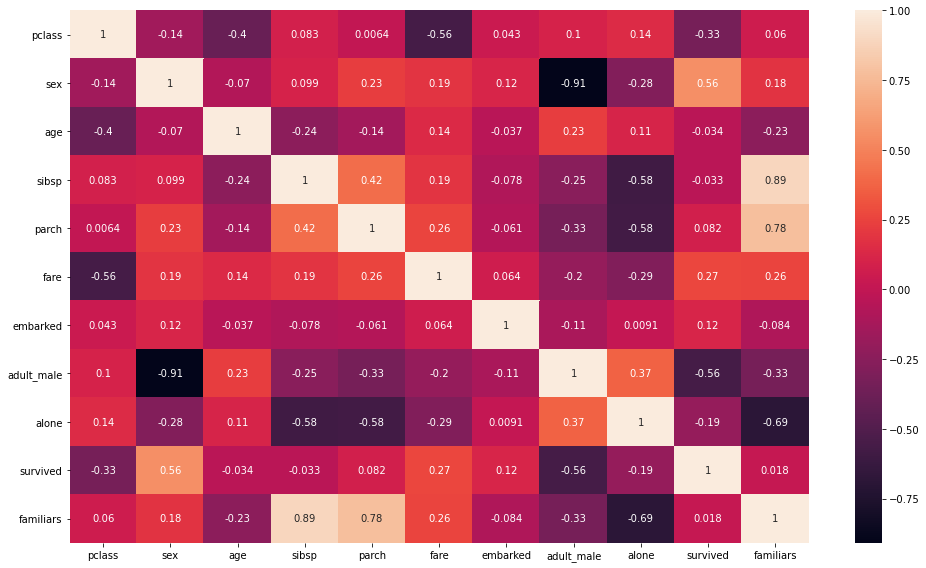

In [39]:
categories = {"female": 1, "male": 0}
train_data['sex']= train_data['sex'].map(categories)
test_data['sex']= test_data['sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
train_data['embarked']= train_data['embarked'].map(categories)
test_data['embarked']= test_data['embarked'].map(categories)

#categories = train_data.Cabin.unique()
#train_data['Cabin'] = train_data.Cabin.astype("category").cat.codes
#test_data['Cabin'] = test_data.Cabin.astype("category").cat.codes

plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()

test_data

In [40]:
# dropping columns
train_data = train_data.drop(['class','who','adult_male','deck','embark_town','alive'], axis=1)
test_data = test_data.drop(['class','who','adult_male','deck','embark_town','alive'], axis=1)
#test_data = test_data.drop(['Name','Ticket','PassengerId'], axis=1)
train_data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,alone,survived,familiars
520,1,1,30.0,0,0,93.5000,1,1,1,1
510,3,0,29.0,0,0,7.7500,3,1,1,1
446,2,1,13.0,0,1,19.5000,1,0,1,2
2,3,1,26.0,0,0,7.9250,1,1,1,1
691,3,1,4.0,0,1,13.4167,2,0,1,2


In [9]:
train_data

,pclass,sex,age,sibsp,parch,fare,embarked,alone,familiars
520,1,NaN,30.0,0,0,93.5000,NaN,1,1
510,3,NaN,29.0,0,0,7.7500,NaN,1,1
446,2,NaN,13.0,0,1,19.5000,NaN,0,2
2,3,NaN,26.0,0,0,7.9250,NaN,1,1
691,3,NaN,4.0,0,1,13.4167,NaN,0,2
...,...,...,...,...,...,...,...,...,...
575,3,NaN,19.0,0,0,14.5000,NaN,1,1
838,3,NaN,32.0,0,0,56.4958,NaN,1,1
337,1,NaN,41.0,0,0,134.5000,NaN,1,1
523,1,NaN,44.0,0,1,57.9792,NaN,0,2


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Dropping label
LABEL = 'survived'
y = train_data[LABEL]
train_data = train_data.drop(LABEL, axis=1)  # Dropping label to normalize
test_data = test_data.drop(LABEL, axis=1)  # Dropping label to normalize

In [42]:

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data)
scaled_test = scaler.transform(test_data)

scaled_train = pd.DataFrame(scaled_train, columns=train_data.columns, index=train_data.index)
scaled_test = pd.DataFrame(scaled_test, columns=test_data.columns, index=test_data.index)

scaled_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,alone,familiars
520,0.0,1.0,0.402011,0.0,0.000000,0.182500,0.0,1.0,0.0
510,1.0,0.0,0.388421,0.0,0.000000,0.015127,1.0,1.0,0.0
446,0.5,1.0,0.170970,0.0,0.166667,0.038061,0.0,0.0,0.1
2,1.0,1.0,0.347649,0.0,0.000000,0.015469,0.0,1.0,0.0
691,1.0,1.0,0.048655,0.0,0.166667,0.026188,0.5,0.0,0.1


In [43]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#scaled_train

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(scaled_train, y_train)

RandomForestClassifier()

In [ ]:

feature_imp = pd.Series(clf.feature_importances_, index=scaled_train.columns).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()